In [2]:
! pip install opendatasets

In [3]:
! pip install keras

In [4]:
! pip install pandas

In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedfayed1010
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images


100%|██████████| 34.1M/34.1M [00:00<00:00, 67.2MB/s]


In [7]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

<ipython-input-7-746d9bf9a122>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [8]:
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented')
X = []
y = []
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,180):
  y.append('MI')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,718):
  y.append('MI')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,13):
  y.append('MO')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,53):
  y.append('MO')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,641):
  y.append('NO')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,2561):
  y.append('NO')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,449):
  y.append('V')
print(y)
os.chdir('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented')
for i in tqdm(os.listdir()):
  img= cv2.imread(i)
  img= cv2.resize(img,(224,224))
  X.append(img)
for i in range(1,1793):
  y.append('V')
print(y)

  0%|          | 0/179 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/717 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/12 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/52 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/640 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/2560 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/448 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

  0%|          | 0/1792 [00:00<?, ?it/s]

['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI

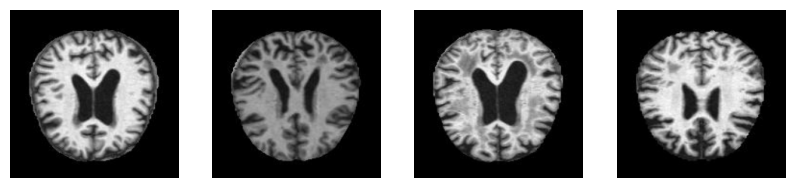

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(X[i], cmap="gray")
  plt.axis('off')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 , stratify=y)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

ValueError: Found input variables with inconsistent numbers of samples: [6401, 6399]

In [7]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [8]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (4288, 224, 224, 3)
X_test Shape:  (2112, 224, 224, 3)
y_train Shape:  (4288, 4)
y_test Shape:  (2112, 4)


In [9]:
from keras.applications import vgg16
img_rows, img_cols = 224, 224
vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

for layer in vgg.layers:
    layer.trainable = False
    layer.trainable  = False
for (i,layer) in enumerate(vgg.layers):
  print(str(i) + " "+ layer.__class__.__name__, layer.trainable)


0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [10]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [11]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model


num_classes = 4
FC_Head = lw(vgg, num_classes)
model = Model(inputs=vgg.input, outputs=FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.models import Model
from keras.optimizers import Adam

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [ ]:
from keras.optimizers import Adam

In [14]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
134/134 [==============================] - 79s 493ms/step - loss: 1.2220 - accuracy: 0.4977 - val_loss: 0.9321 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 2/30
134/134 [==============================] - 62s 461ms/step - loss: 0.9440 - accuracy: 0.5452 - val_loss: 0.8857 - val_accuracy: 0.5881 - lr: 0.0010
Epoch 3/30
134/134 [==============================] - 64s 479ms/step - loss: 0.9067 - accuracy: 0.5590 - val_loss: 0.8729 - val_accuracy: 0.5810 - lr: 0.0010
Epoch 4/30
134/134 [==============================] - 63s 468ms/step - loss: 0.8843 - accuracy: 0.5809 - val_loss: 0.8490 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 5/30
134/134 [==============================] - 61s 453ms/step - loss: 0.8601 - accuracy: 0.6012 - val_loss: 0.8761 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 6/30
134/134 [==============================] - 61s 452ms/step - loss: 0.8301 - accuracy: 0.6126 - val_loss: 0.8584 - val_accuracy: 0.6027 - lr: 0.0010
Epoch 7/30
134/134 [==============================] 

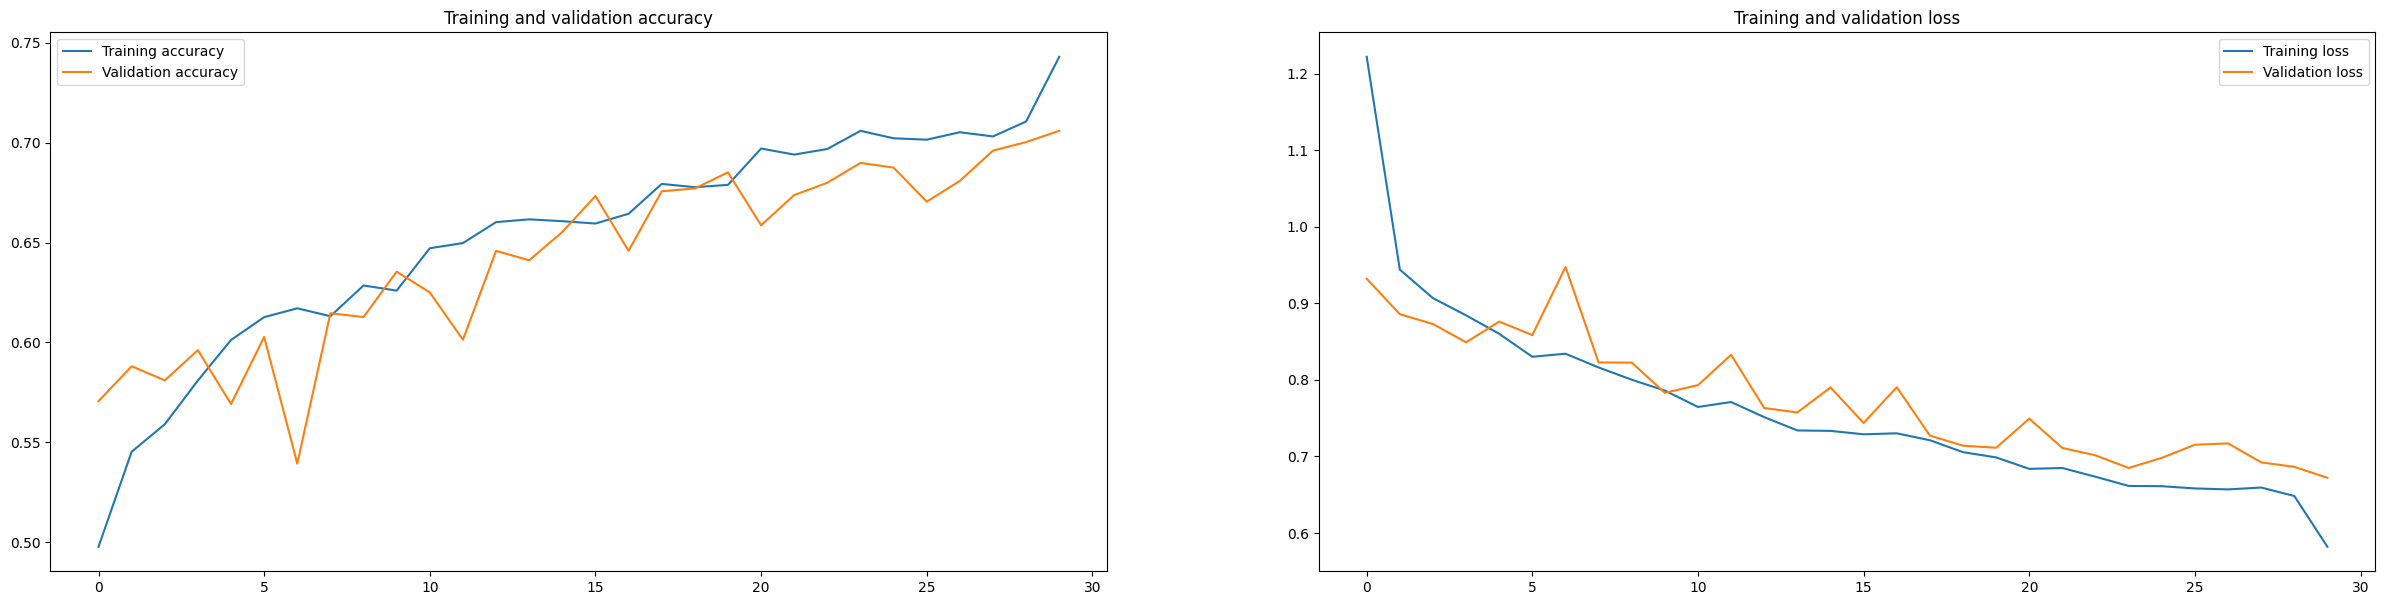

In [24]:
plt.figure(figsize=(30, 7))  # Adjust the width and height as needed
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1
    zoom_range=0.1
    horizontal_flip=True
    rescale=1./255

)

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from keras.applications import vgg16
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

# Function to load images and labels
def load_images_and_labels(directory, label, img_size=(224, 224)):
    X = []
    y = []
    for filename in tqdm(os.listdir(directory)):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return X, y

# Directories and labels
datasets = [
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented', 'MI'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented', 'MI'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented', 'MO'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented', 'MO'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented', 'NO'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented', 'NO'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented', 'V'),
    ('/content/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented', 'V')
]

# Load all data
X = []
y = []
for directory, label in datasets:
    X_data, y_data = load_images_and_labels(directory, label)
    X.extend(X_data)
    y.extend(y_data)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


100%|██████████| 1792/1792 [00:01<00:00, 1088.45it/s]


X_train Shape:  (4288, 224, 224, 3)
X_test Shape:  (2112, 224, 224, 3)
y_train Shape:  (4288, 4)
y_test Shape:  (2112, 4)


In [ ]:
from keras import regularizers

In [ ]:
# Load the VGG model without the top layers
img_rows, img_cols = 224, 224
vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze all the layers
for layer in vgg.layers:
    layer.trainable = False

# Function to create the top model
def lw_with_regularization(bottom_model, num_classes):
    """creates the top or head of the model that will be placed on top of the bottom layers"""
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Create the new head for the model with regularization
num_classes = 4
FC_Head = lw_with_regularization(vgg, num_classes)
model = Model(inputs=vgg.input, outputs=FC_Head)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create an image data generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

# Compile the model with a lower learning rate for fine-tuning
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'X_train' is not defined

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/30
134/134 [==============================] - 78s 488ms/step - loss: 24.6397 - accuracy: 0.4219 - val_loss: 21.7609 - val_accuracy: 0.5189
Epoch 2/30
134/134 [==============================] - 67s 498ms/step - loss: 21.0732 - accuracy: 0.4443 - val_loss: 19.5249 - val_accuracy: 0.5256
Epoch 3/30
134/134 [==============================] - 66s 495ms/step - loss: 18.8383 - accuracy: 0.4513 - val_loss: 17.7189 - val_accuracy: 0.5322
Epoch 4/30
134/134 [==============================] - 64s 479ms/step - loss: 17.0805 - accuracy: 0.4837 - val_loss: 16.2431 - val_accuracy: 0.5436
Epoch 5/30
134/134 [==============================] - 71s 533ms/step - loss: 15.6181 - accuracy: 0.5012 - val_loss: 14.8874 - val_accuracy: 0.5445
Epoch 6/30
134/134 [==============================] - 64s 479ms/step - loss: 14.3350 - accuracy: 0.5065 - val_loss: 13.6996 - val_accuracy: 0.5398
Epoch 7/30
134/134 [==============================] - 66s 494ms/step - loss: 13.2016 - accuracy: 0.5042 - val_loss: 12

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


66/66 - 9s - loss: 2.0305 - accuracy: 0.6094 - 9s/epoch - 130ms/step
Test accuracy: 0.609375


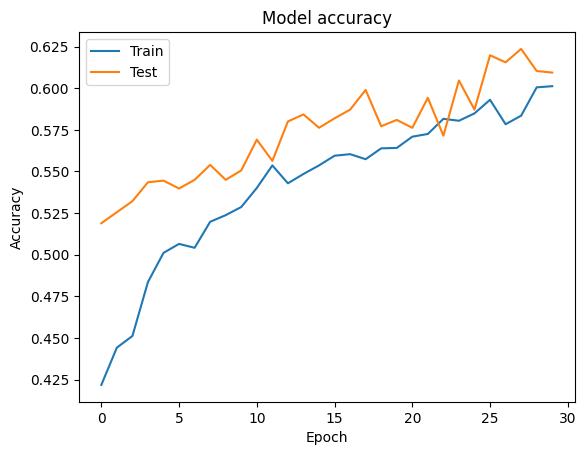

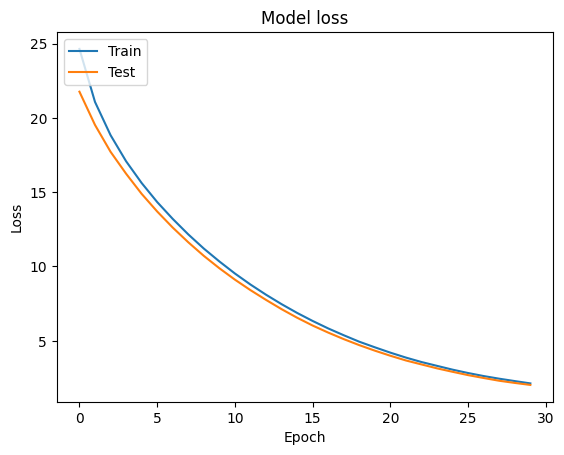

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model_save_path = 'datasets/alzheimers-dataset/mobilenet_model_our.h5'
model_save_path = os.path.expanduser(model_save_path)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")